<a href="https://colab.research.google.com/github/Matt-ctrl/ai-workshop-utm-july11/blob/main/Data_preparations_UTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

When working with images (or any data), we first need to **convert our raw data into tensors**. In PyTorch, this is done using:

* `torchvision.datasets` — to wrap and organize the dataset
* `DataLoader` — to batch and shuffle the data



>Why use `torchvision.datasets`?

Because in many cases, **our data consists of multiple files**, often organized in nested folders by class.

We *could* write custom code to load each image and convert it into a tensor, but `torchvision` provides ready-to-use **dataset classes** (like `ImageFolder`, `DatasetFolder`, `Caltech101`, `MNIST`, etc.) that:

* Handle file loading
* Apply transforms (like resizing, normalization)
* Automatically label the data based on folder names or annotations


>Why use `DataLoader`?

Once we have the dataset object, we wrap it in a `DataLoader` to:

* Split the data into **mini-batches**
* Optionally shuffle the data for better learning
* Automatically handle loading on CPU or GPU



>Why mini-batches?

Instead of feeding **all data at once** to the model (which is slow and memory-intensive), we feed it **in chunks (mini-batches)**.

Benefits:

* Faster and more efficient training
* Allows **gradient updates per batch**, helping the model learn step by step
* Reduces memory usage on GPU


```
Raw Dataset
    ↓
[PyTorch Dataset]
    ↓
[Split: train_dataset & test_dataset]
    ↓
[DataLoader: train_loader & test_loader]
    ↓
Train / Evaluate Model

OR

Raw Dataset
    ↓
Split train/test
    ↓
[PyTorch train & test Dataset]
    ↓
[DataLoader: train_loader & test_loader]
    ↓
Train / Evaluate Model

```


## Torchvision

From the [PyTorch Datasets Documentation](https://pytorch.org/vision/stable/datasets.html), `torchvision` provides tools for handling image datasets more easily.

There are **two main ways** to work with datasets in `torchvision`:


### 1. Built-in Datasets

These are datasets that PyTorch already hosts and supports (e.g. MNIST, CIFAR-10, Caltech101).
You don’t need to manually download or organize the files — just call the dataset class and set `download=True`.

>**Why use them?**

* Easy to set up
* Good for learning, testing, or prototyping
* Automatically labeled and structured



### 2. Custom Datasets (Your Own Data)

If you have your own dataset (e.g., downloaded from a research website), you have **two options**:

#### Option A: Follow `ImageFolder` Structure

If your dataset is organized like this:

```
root/
├── class_1/
│   ├── img1.jpg
│   └── ...
├── class_2/
│   └── ...
```

Then you can use `torchvision.datasets.ImageFolder` directly — no extra work needed!

#### Option B: Custom Dataset Class

If your data is **not** structured for `ImageFolder`, you’ll need to:

* Write a custom `Dataset` class
* Inherit from `torch.utils.data.Dataset`
* Implement `__init__`, `__len__`, and `__getitem__`

This lets you define how the data is read, transformed, and returned — while still taking advantage of PyTorch’s `DataLoader` functionality.

There are other custom classes besides `ImageFolder`, you can refer to [docs](https://docs.pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets)

There are two ways we preparing dataset and dataloaders

###Built-in

100%|██████████| 792M/792M [03:39<00:00, 3.60MB/s]
100%|██████████| 19.2M/19.2M [00:05<00:00, 3.65MB/s]


Class names: ['Abyssinian', 'American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British Shorthair', 'Chihuahua', 'Egyptian Mau', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees', 'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Maine Coon', 'Miniature Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian Blue', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu', 'Siamese', 'Sphynx', 'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']


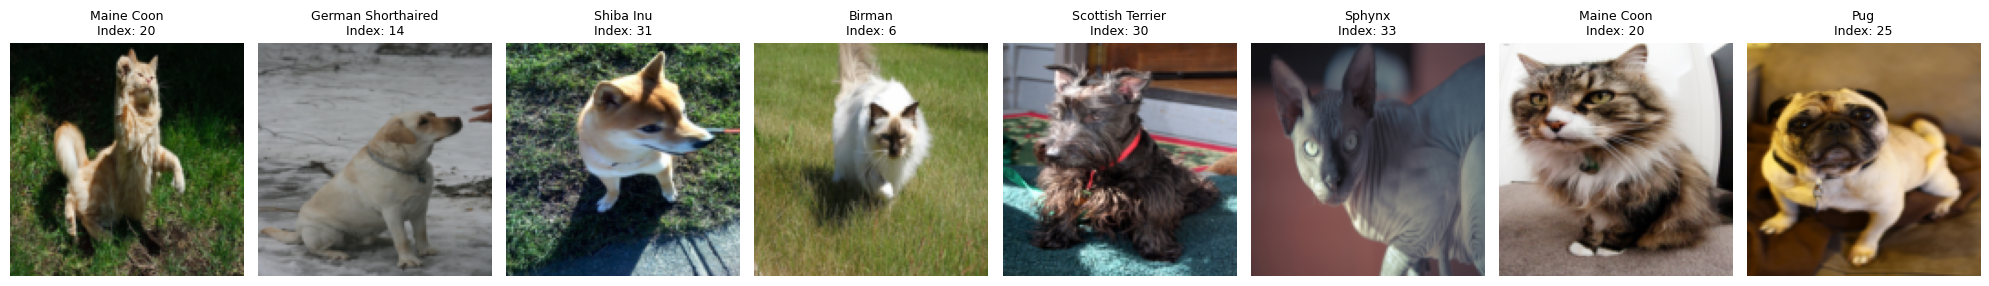

In [ ]:
import torch
from torchvision.datasets import OxfordIIITPet
from torchvision.transforms import v2
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transform for images
# transform = transforms.Compose([
#     transforms.Resize((128, 128)),
#     transforms.ToTensor()
# ])

torch.manual_seed(42)

transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(dtype=torch.float32, scale=True),
    v2.Resize(size=(128,128))
])
# Load built-in Oxford-IIIT Pet dataset (Train split)
dataset = OxfordIIITPet(root=".", download=True, split="trainval", target_types="category", transform=transform)

# Create dataloader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Class names from dataset
class_names = dataset.classes  # List of class names
print("Class names:", class_names)

# View one batch
images, labels = next(iter(dataloader))

# Plot
plt.figure(figsize=(20, 4))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title(f"{class_names[labels[i]]}\nIndex: {labels[i].item()}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

###Custom Dataset (using imageFolder) -NO NEED TO RUN

To demonstrate this, im using Oxford-IIT pet, however the structure doesnt follow `ImageFolder` by default, so we need to arrange it manually

In [ ]:
# -----------------------------
# 1. Download the dataset
# -----------------------------
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

# -----------------------------
# 2. Extract the dataset
# -----------------------------
!mkdir -p oxford_pets
!tar -xzf images.tar.gz -C oxford_pets/
!tar -xzf annotations.tar.gz -C oxford_pets/

# -----------------------------
# 3. Reorganize images into ImageFolder format
# -----------------------------
import os
import shutil

src_dir = "oxford_pets/images"
dst_dir = "oxford_pets/imagefolder"

os.makedirs(dst_dir, exist_ok=True)

for img_file in os.listdir(src_dir):
    if img_file.endswith(".jpg"):
        # Extract breed name (everything before the last underscore)
        breed_name = "_".join(img_file.split("_")[:-1])
        breed_dir = os.path.join(dst_dir, breed_name)
        os.makedirs(breed_dir, exist_ok=True)

        # Copy image to breed subfolder
        src_path = os.path.join(src_dir, img_file)
        dst_path = os.path.join(breed_dir, img_file)
        shutil.copy(src_path, dst_path)

print("Reorganized into ImageFolder structure.")

--2025-07-08 10:02:00--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-07-08 10:02:01--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  7.80MB/s    in 57s     

2025-07-08 10:02:58 (13.3 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2025-07-08 10:02:59--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.o

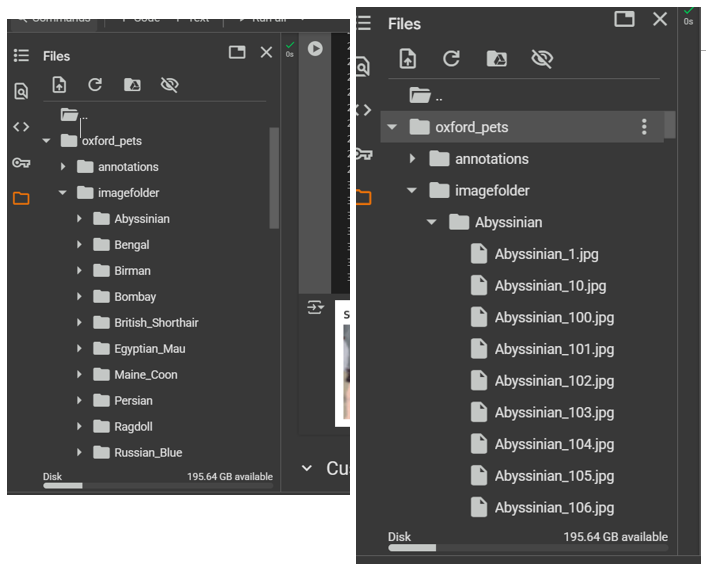

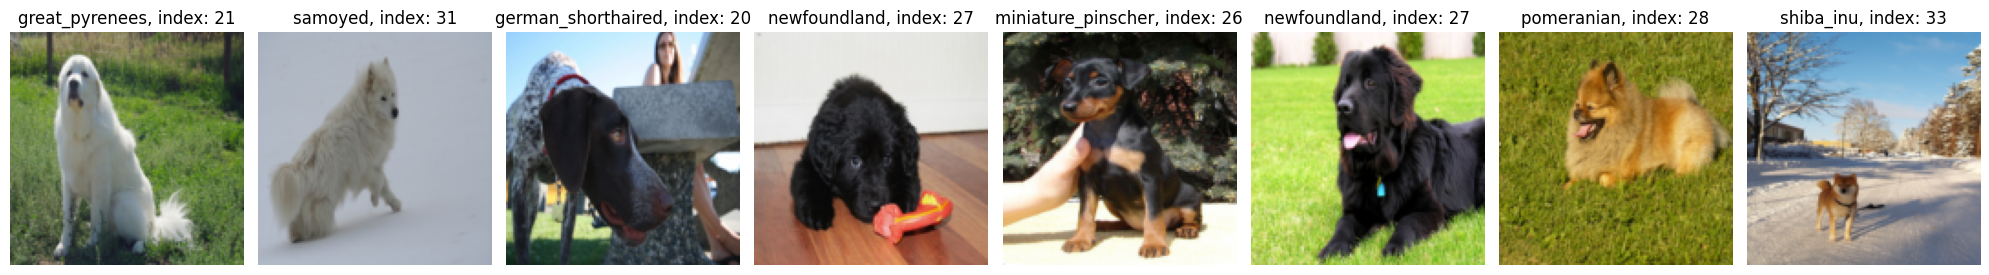

In [ ]:
# -----------------------------
# 4. Load using ImageFolder
# -----------------------------
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# transform = transforms.Compose([
#     transforms.Resize((128, 128)),
#     transforms.ToTensor()
# ])

torch.manual_seed(42)

transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(dtype=torch.float32, scale=True),
    v2.Resize(size=(128,128))
])


dataset = ImageFolder("oxford_pets/imagefolder", transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Show a batch
class_names = dataset.classes

images, labels = next(iter(dataloader))
plt.figure(figsize=(20, 4))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(images[i].permute(1, 2, 0))  # Convert CHW to HWC
    plt.title(f"{class_names[labels[i]]}, index: {labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
#since we're using ImageFolder function

#we can get the class names
dataset.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [ ]:
# class to index
dataset.class_to_idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

##Custom Datasets & Custom folder structure (**NO NEED TO RUN**)

In [ ]:
# Download the datasets
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

# Extract both
!mkdir -p oxford_pets
!tar -xzf images.tar.gz -C oxford_pets/
!tar -xzf annotations.tar.gz -C oxford_pets/


--2025-07-07 15:30:34--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-07-07 15:30:35--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  21.6MB/s    in 69s     

2025-07-07 15:31:44 (11.0 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2025-07-07 15:31:44--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.o

According to the website [OxfordIIIT-pet](https://www.robots.ox.ac.uk/~vgg/data/pets/)

>The following annotations are available for every image in the dataset: (a) species and breed name; (b) a tight bounding box (ROI) around the head of the animal; and (c) a pixel level foreground-background segmentation (Trimap).

From the file running from previous code cell, `annotations.tar.gz` will extract content into your colab "Files" left tab below is the picture that show folder content

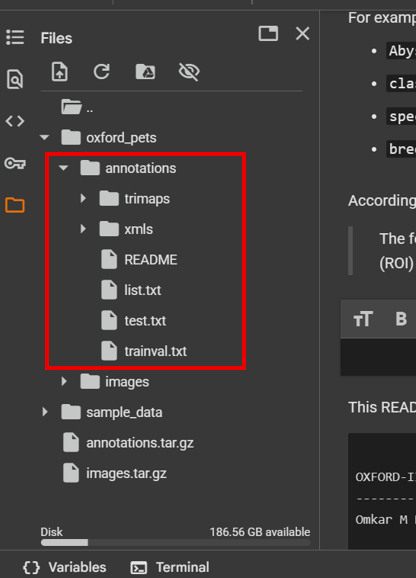

`trainval.txt` contains our label for all images. So we'll be using trainval.txt as the label for training. Ignore the `test.txt` because it contains the filenames without label and it serves for different purposes such as benchmarking

As for `images.tar.gz`, we get these folder after we extracted

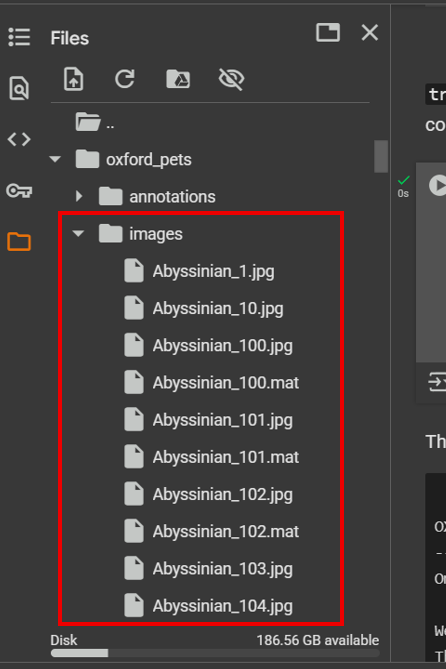

In [ ]:
import os

img_dir = "oxford_pets/images"
annotation_file = "oxford_pets/annotations/trainval.txt"

# Check a few files
print("Sample image filenames:", os.listdir(img_dir)[:5])


Sample image filenames: ['British_Shorthair_83.jpg', 'Siamese_94.jpg', 'newfoundland_35.jpg', 'newfoundland_177.jpg', 'german_shorthaired_115.jpg']


This is how they label each image

```
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

```

For example on of the labels in `trainval.txt`contain these label
`Abyssinian_100 1 1 2`

* `Abyssinian_100.jpg` → the image

* `class_id` = `1` → the breed (1–37)

* `species` = `1` → `1 = cat, 2 = dog`

* `breed_id` = `2` → `alternate internal breed ID`

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class OxfordPetDataset(Dataset):
    def __init__(self, img_dir, label_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.data = []

        class_ids = set()

        with open(label_file, "r") as f:
            for line in f:
                name, class_id, *_ = line.strip().split()
                class_id = int(class_id) - 1  # make class_id 0-based
                self.data.append((f"{name}.jpg", class_id))
                class_ids.add(class_id)

        # Create .classes and .class_to_idx (optional: use actual breed names)
        sorted_ids = sorted(class_ids)
        self.classes = [f"class_{i}" for i in sorted_ids]
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        filename, label = self.data[idx]
        img_path = os.path.join(self.img_dir, filename)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

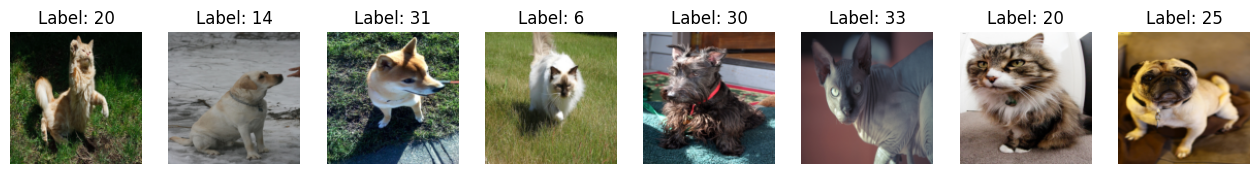

In [ ]:
import torch

torch.manual_seed(42) #reproducibility
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = OxfordPetDataset("oxford_pets/images", "oxford_pets/annotations/trainval.txt", transform) #this is where we transform each image to Tensor
loader = DataLoader(dataset, batch_size=8, shuffle=True) #dataloader is where we divide the whole dataset into "batch", here im using batch 8, total samples is 3680, batches = 3680/8 = 460

# Visualize a batch
import matplotlib.pyplot as plt

images, labels = next(iter(loader))
fig, axs = plt.subplots(1, 8, figsize=(16, 3))
for i in range(8):
    axs[i].imshow(images[i].permute(1, 2, 0))
    axs[i].set_title(f"Label: {labels[i].item()}")
    axs[i].axis("off")
plt.show()


recall the way the label is we have three label on each image ie. `1 1 2` represent `<image_id> <class_id> <species> <breed_id>`. However the image above only show the `class_id`... ie `label:20` is the `class_id` `20`

This README of annotation

```

OXFORD-IIIT PET Dataset
-----------------------
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar

We have created a 37 category pet dataset with roughly 200 images for each class.
The images have a large variations in scale, pose and lighting. All images have an
associated ground truth annotation of breed, head ROI, and pixel
level trimap segmentation.

Contents:
--------
trimaps/ 	Trimap annotations for every image in the dataset
		Pixel Annotations: 1: Foreground 2:Background 3: Not classified
xmls/		Head bounding box annotations in PASCAL VOC Format

list.txt	Combined list of all images in the dataset
		Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
		All images with 1st letter as captial are cat images while
		images with small first letter are dog images.
trainval.txt	Files describing splits used in the paper.However,
test.txt	you are encouraged to try random splits.





```

In [ ]:
with open("oxford_pets/annotations/trainval.txt", "r") as f:
    lines = f.readlines()
    print(f"Total samples: {len(lines)}")

Total samples: 3680


In [ ]:
import math

batch_size = 8
total_samples = len(lines)
total_batches = math.ceil(total_samples / batch_size)
print(f"Total batches (batch_size=8): {total_batches}")

Total batches (batch_size=8): 460


###Spliting 80/20 (train/test)

In [ ]:
from sklearn.model_selection import train_test_split

# Load list from trainval.txt
with open("oxford_pets/annotations/trainval.txt", "r") as f:
    lines = f.read().strip().split("\n")

# Split into 80% train and 20% test
train_lines, test_lines = train_test_split(lines, # we use the list as data to split because in the list it contains the filenames
                                           test_size=0.2, #0.2 is 20% testing, the rest (80%) is reserves for training
                                           random_state=42) #this data we'll pass to our model for training and test

print(f"Total: {len(lines)} images")
print(f"Train set: {len(train_lines)} images")
print(f"Validation set: {len(test_lines)} images")


Total: 3680 images
Train set: 2944 images
Validation set: 736 images


##Before we move to training.

We usually train the model for a number of iterations or epochs until we achieve good accuracy.

Let’s look at what happens during the first epoch (for unbatched data). Consider that we are training a deep learning model for Cat vs Dog classification.


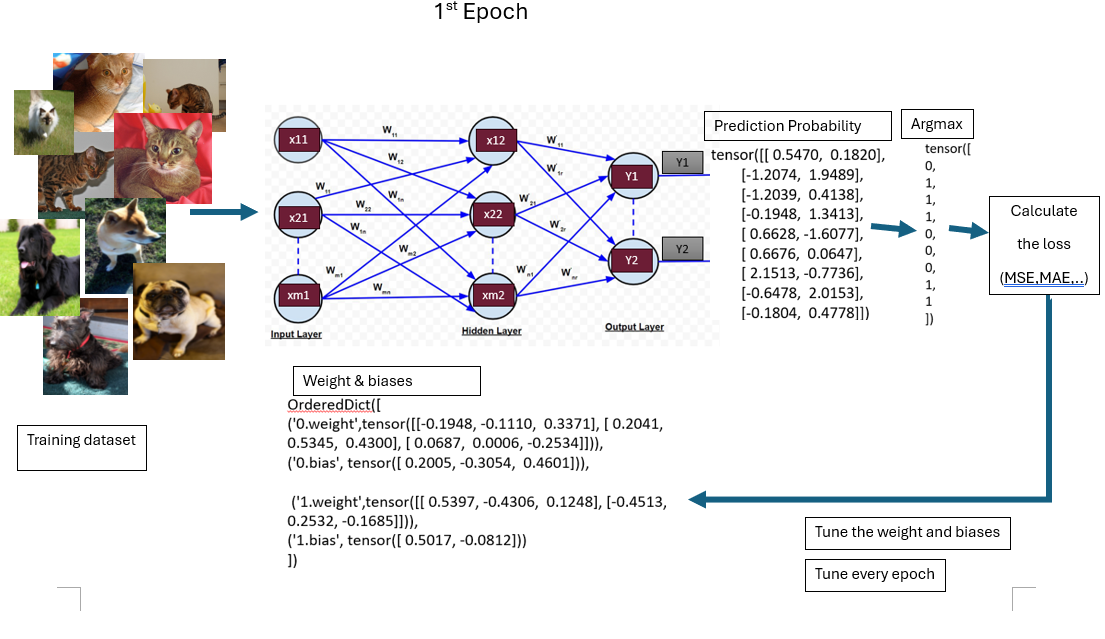

** For this example we should use loss function such as `nn.BinaryCrossEntropy()` (for binary class) & `nn.CrossEntropy()` (for multiclass), however I state MSE and MAE because it is common loss we've heard but in DL/ML this loss function is used when we tackle regresssion task.

When using batches..

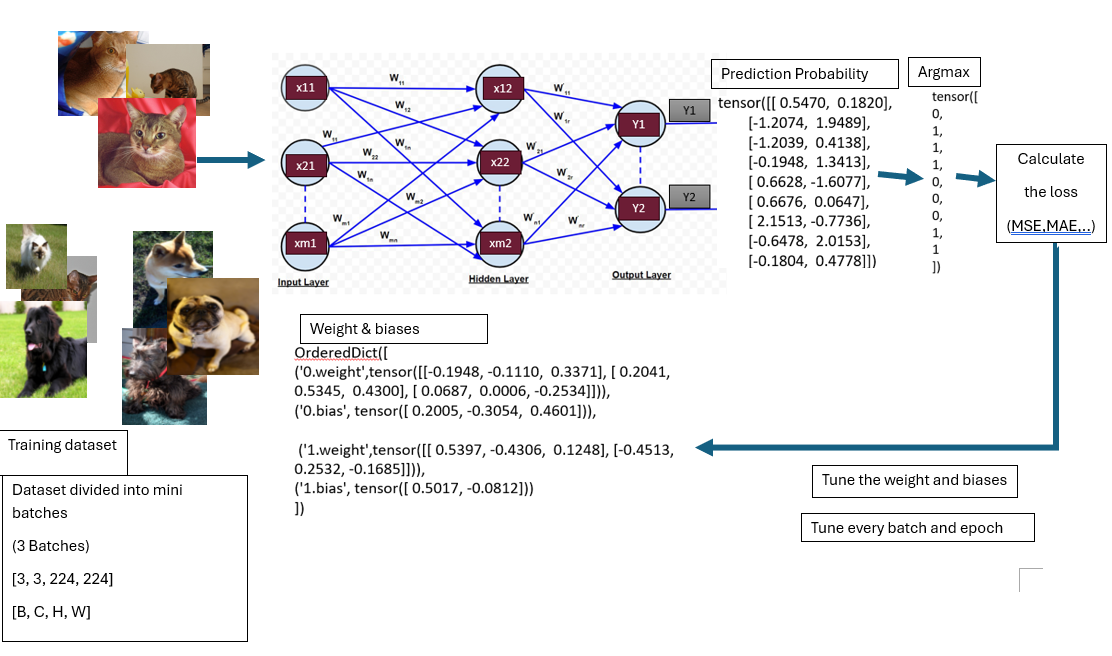